Regression

    1) Matrix Inverse
    2) gredient

In [1]:
#데이터
import numpy as np
x=np.array([1,2,3,4])
y=np.array([6,5,7,10])

In [2]:
#1차원 Tranpose
x=np.array([x,np.ones(len(x))])
x=x.T
print(x)

[[1. 1.]
 [2. 1.]
 [3. 1.]
 [4. 1.]]


In [3]:
print x.shape,x.T.shape

(4L, 2L) (2L, 4L)


In [5]:
#Matrix Inverse
np.dot(x,x.T)
np.linalg.inv(np.dot(x,x.T)) 
##위 라인에서 Singular matrix에러가 발생
###이는 가역행렬이 아닌, inverse할 수 없는 행렬이라는 뜻

LinAlgError: Singular matrix

In [6]:
#dot : 내적
xTx=np.dot(x.T,x)
print("xTx=",xTx)

('xTx=', array([[30., 10.],
       [10.,  4.]]))


In [7]:
xTxI=np.linalg.inv(xTx)
print("xTxI=",xTxI)

('xTxI=', array([[ 0.2, -0.5],
       [-0.5,  1.5]]))


In [8]:
xTyT=np.dot(x.T,y)
print("xTyT=",xTyT)

('xTyT=', array([77., 28.]))


In [9]:
print("weights=",np.dot(xTxI,xTyT))

('weights=', array([1.4, 3.5]))


In [10]:
np.dot(np.linalg.inv(np.dot(x.T, x)), np.dot(x.T, y))

array([1.4, 3.5])

In [11]:
##numpy 최소자승법
np.warnings.filterwarnings('ignore')   #suppress numpy warnings
print("numpy lstsq: ",np.linalg.lstsq(x,y))

('numpy lstsq: ', (array([1.4, 3.5]), array([4.2]), 2, array([5.77937881, 0.77380911])))


In [13]:
np.set_printoptions(formatter={'float': '{: 0.2f}'.format})
w1,w0=np.linalg.lstsq(x,y)[0]
print("w1=",w1,"\nw0=",w0)

('w1=', 1.4000000000000001, '\nw0=', 3.4999999999999982)


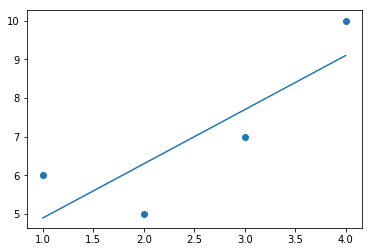

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# compute yhat from the model values of b0 and b1
x=np.array([1,2,3,4])
y=np.array([6,5,7,10])
_x=np.array([x,np.ones(len(x))])
_x=_x.T
b1,b0=np.linalg.lstsq(_x,y)[0]
yhat=b0+b1*x
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(x,y)
ax.plot(x,yhat)

# Matrix Inverse Method 회귀모델

데이터 x1 [1,2],[1,4],[1,6] y1 3,6,7




In [15]:
import numpy as np
x1=np.array([[1,2],[1,4],[1,6]])
y1=np.array([3,6,7])

In [16]:
print(x1.shape,y1.shape)

((3L, 2L), (3L,))


In [17]:
print x1

[[1 2]
 [1 4]
 [1 6]]


In [18]:
xTx=np.dot(x1.T,x1)
print("xTx=",xTx)

xTxI=np.linalg.inv(xTx)
print("xTxI=",xTxI)

xTyT=np.dot(x1.T,y1)
print("xTyT=",xTyT)

('xTx=', array([[ 3, 12],
       [12, 56]]))
('xTxI=', array([[ 2.33, -0.50],
       [-0.50,  0.12]]))
('xTyT=', array([16, 72]))


In [19]:
np.dot(np.linalg.inv(np.dot(x1.T, x1)), np.dot(x1.T, y1))

array([ 1.33,  1.00])

In [20]:
print "i  error       ","y       ","pred    "
print "-- ------------","--------","--------"
for i in range(len(x1)):
  predicted=w0*x1[i][0] + w1*x1[i][1]
  error=y1[i]-predicted
  print("{:2d} {}={}-{:.2f}".format(i,error,y1[i],predicted))

i  error        y        pred    
-- ------------ -------- --------
 0 -3.3=3-6.30
 1 -3.1=6-9.10
 2 -4.9=7-11.90


In [21]:
w=np.array([w0,w1])
x1.shape,w.shape
w=w[:,np.newaxis]
print w.shape
print w

(2L, 1L)
[[ 3.50]
 [ 1.40]]


<h1>Gradient</h1>

$\beta \alpha$

$\ x^2 x^0$

In [26]:
import sympy as sp
import numpy as np

x=np.array([1,2,3,4])
y=np.array([6,5,7,10])
b0, b1=sp.symbols('b0 b1') 
np.sum(-2*(y-(b0+x.dot(b1)))) 

8*b0 + 20*b1 - 56

위의 np.sum은 $\sum$와 같다.

$\beta^0=1$, $\beta^1=1$이면 각각 -28, -74 

이 값을 대입해서, 새로운 bo, b1을 구하면:

new b0 = 1 - 0.01 * (-28) = 1.28
new b1 = 1 - 0.01 * (-74) = 1.74

In [27]:
import numpy as np
x=np.array([1,2,3,4])
y=np.array([6,5,7,10])

In [28]:
x=np.array([x,np.ones(len(x))])  # w0 * x0 + w1 * x1
x=x.T #[[x0,x1,x2,x3], [1,1,1,1]]의 전치행렬을 구한다.
print x, x.shape 

[[ 1.00  1.00]
 [ 2.00  1.00]
 [ 3.00  1.00]
 [ 4.00  1.00]] (4L, 2L)


In [29]:
theta=np.array(np.ones([x.shape[1]]))
print theta

[ 1.00  1.00]


In [30]:
print x*theta #틀린 코드, 아래와 같이 한다.
print np.dot(x,theta) #전치된 x행렬과 theta를 내적 = h(x)

[[ 1.00  1.00]
 [ 2.00  1.00]
 [ 3.00  1.00]
 [ 4.00  1.00]]
[ 2.00  3.00  4.00  5.00]


In [31]:
def h(x,theta):
    return np.dot(x,theta)

h(x,theta)

array([ 2.00,  3.00,  4.00,  5.00])

In [32]:
#error
error=h(x,theta)-y #h(x)-y
print error

[-4.00 -2.00 -3.00 -5.00]


In [34]:
#gradient
print np.sum(y-h(x,theta))*(-2)/len(x) # -(error)*(-2)/len(x)

gradient=np.dot(x.T,error) #x의 전치행렬(원래 행렬)과 error를 내적 = gradient
print gradient

-7.0
[-37.00 -14.00]


In [35]:
#update
alpha=0.01 #학습율
theta -= alpha*gradient
print theta

[ 1.37  1.14]


In [36]:
#이를 총 정리하면
#def gradientDescent(x, y, theta, alpha, m, numIterations):
alpha=0.01
numIterations=4000
theta=np.ones([x.shape[1]])
#theta=np.array([1,1])
for i in range(numIterations):
    h=np.dot(x,theta)
    error=h-y
    #gradient=[np.sum(y-h)*(-2), np.sum((y-h)*x)*(-2)]
    cost = np.sum((h-y)** 2) / (2 * len(x))
    gradient=np.dot(x.T,error) # w0, w1
    theta -= alpha*gradient
    if i%100 == 0:
        print "Iteration {0} | theta {1} Cost {2:.5f}".format(i, theta, cost)
#    return theta

Iteration 0 | theta [ 1.37  1.14] Cost 6.75000
Iteration 100 | theta [ 1.79  2.34] Cost 0.63779
Iteration 200 | theta [ 1.62  2.87] Cost 0.55893
Iteration 300 | theta [ 1.52  3.15] Cost 0.53521
Iteration 400 | theta [ 1.46  3.31] Cost 0.52807
Iteration 500 | theta [ 1.44  3.40] Cost 0.52592
Iteration 600 | theta [ 1.42  3.44] Cost 0.52528
Iteration 700 | theta [ 1.41  3.47] Cost 0.52508
Iteration 800 | theta [ 1.41  3.48] Cost 0.52503
Iteration 900 | theta [ 1.40  3.49] Cost 0.52501
Iteration 1000 | theta [ 1.40  3.49] Cost 0.52500
Iteration 1100 | theta [ 1.40  3.50] Cost 0.52500
Iteration 1200 | theta [ 1.40  3.50] Cost 0.52500
Iteration 1300 | theta [ 1.40  3.50] Cost 0.52500
Iteration 1400 | theta [ 1.40  3.50] Cost 0.52500
Iteration 1500 | theta [ 1.40  3.50] Cost 0.52500
Iteration 1600 | theta [ 1.40  3.50] Cost 0.52500
Iteration 1700 | theta [ 1.40  3.50] Cost 0.52500
Iteration 1800 | theta [ 1.40  3.50] Cost 0.52500
Iteration 1900 | theta [ 1.40  3.50] Cost 0.52500
Iteration 20

위의 결과를 보면 1000번째 반복할 즈음에 theta(가중치)가 1.40 3.50으로 고정되는데, 이 점이 오차(y-yhat)가 최소가 되는 값이라고 할 수 있다.


<h1>회귀식 그래프 함수 문제 </h1>

In [37]:
import numpy as np

x= np.arange(0,9)
y=[19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24]

In [38]:
A=np.array([x,np.ones(len(x))])

In [39]:
print A, A.T

[[ 0.00  1.00  2.00  3.00  4.00  5.00  6.00  7.00  8.00]
 [ 1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00]] [[ 0.00  1.00]
 [ 1.00  1.00]
 [ 2.00  1.00]
 [ 3.00  1.00]
 [ 4.00  1.00]
 [ 5.00  1.00]
 [ 6.00  1.00]
 [ 7.00  1.00]
 [ 8.00  1.00]]


In [44]:
np.warnings.filterwarnings('ignore')  
A=A.T
b0, b1=np.linalg.lstsq(A.T,y)[0]
fitted=w[0]*x+w[1]
print fitted

[ 1.40  4.90  8.40  11.90  15.40  18.90  22.40  25.90  29.40]


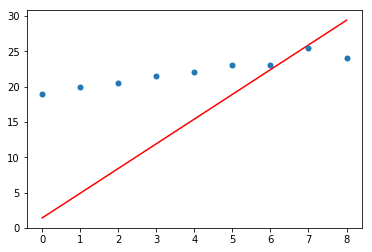

In [45]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plt.plot(x,fitted,'r-',x,y,'o',markersize=5)
plt.show()

In [46]:
#위를 함수로 만들면
def drawRegress2d(x,y):
    """
    Parameters
    ----------
        arg1: list or array
        arg2: list or array
    Returns
    -------
        None
    Examples
    --------
        x=np.arange(0,9)
        y=[19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24] 
        drawRegress2d(x,y)
    """
    import matplotlib.pyplot as plt 
    import numpy as np
    A=np.array([x,np.ones(len(x))])
    w=np.linalg.lstsq(A.T,y)[0]
    fitted=w[0]*x+w[1]
    #plt.plot(x,y,'r-',xi,y,'o',markersize=5)
    plt.plot(x, y, 'o-', label='Original data', markersize=5)
    plt.plot(x, fitted, 'r', label='Fitted line')
    plt.show()

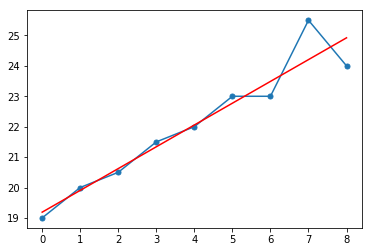

In [47]:
%matplotlib inline

import numpy as np
x=np.arange(0,9)
y=[19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24] 
drawRegress2d(x,y)

# 정규화 회귀모형

In [48]:
#데이터 읽기
import pandas as pd
file_name="http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
column_names = ["sex", "length", "diameter", "height", "whole weight", 
                "shucked weight", "viscera weight", "shell weight", "rings"]
abalone = pd.read_csv(file_name, names=column_names)

In [49]:
abalone.head()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [50]:
#sample 무작위 선별
abalone.sample(n=10)

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
2048,I,0.440,0.305,0.115,0.3790,0.1620,0.0910,0.1100,9
3199,F,0.490,0.380,0.155,0.5780,0.2395,0.1255,0.1800,9
2920,M,0.600,0.450,0.195,1.3400,0.6170,0.3255,0.3605,10
766,F,0.590,0.445,0.130,1.1325,0.3825,0.2340,0.3200,13
3929,F,0.650,0.515,0.215,1.4980,0.5640,0.3230,0.4250,16
3344,I,0.495,0.380,0.145,0.5150,0.1750,0.0980,0.2120,13
3249,M,0.300,0.240,0.090,0.1610,0.0725,0.0390,0.0500,6
3261,F,0.645,0.520,0.190,1.3105,0.5800,0.2880,0.3700,12
181,M,0.640,0.510,0.175,1.3680,0.5150,0.2660,0.5700,21
114,F,0.545,0.410,0.125,0.6935,0.2975,0.1460,0.2100,11


In [51]:
abalone.describe()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


height의 최솟값(min)이 0인데, 이유를 알 수 없으므로 

(1) 평균으로 대체하거나, (2) 모두 결측으로 처리할 수 있다.(모두 제거) 

이 때, 평균의 값이 오르는 것을 주의해야 한다.

In [52]:
abalone = abalone[abalone['height']>0] #이 경우에는 결측으로 처리하여 제거한다.
abalone.describe()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
count,4175.000000,4175.00000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000
mean,0.524065,0.40794,0.139583,0.829005,0.359476,0.180653,0.238834,9.935090
std,0.120069,0.09922,0.041725,0.490349,0.221954,0.109605,0.139212,3.224227
min,0.075000,0.05500,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.35000,0.115000,0.442250,0.186250,0.093500,0.130000,8.000000
50%,0.545000,0.42500,0.140000,0.800000,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.48000,0.165000,1.153500,0.502000,0.253000,0.328750,11.000000
max,0.815000,0.65000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


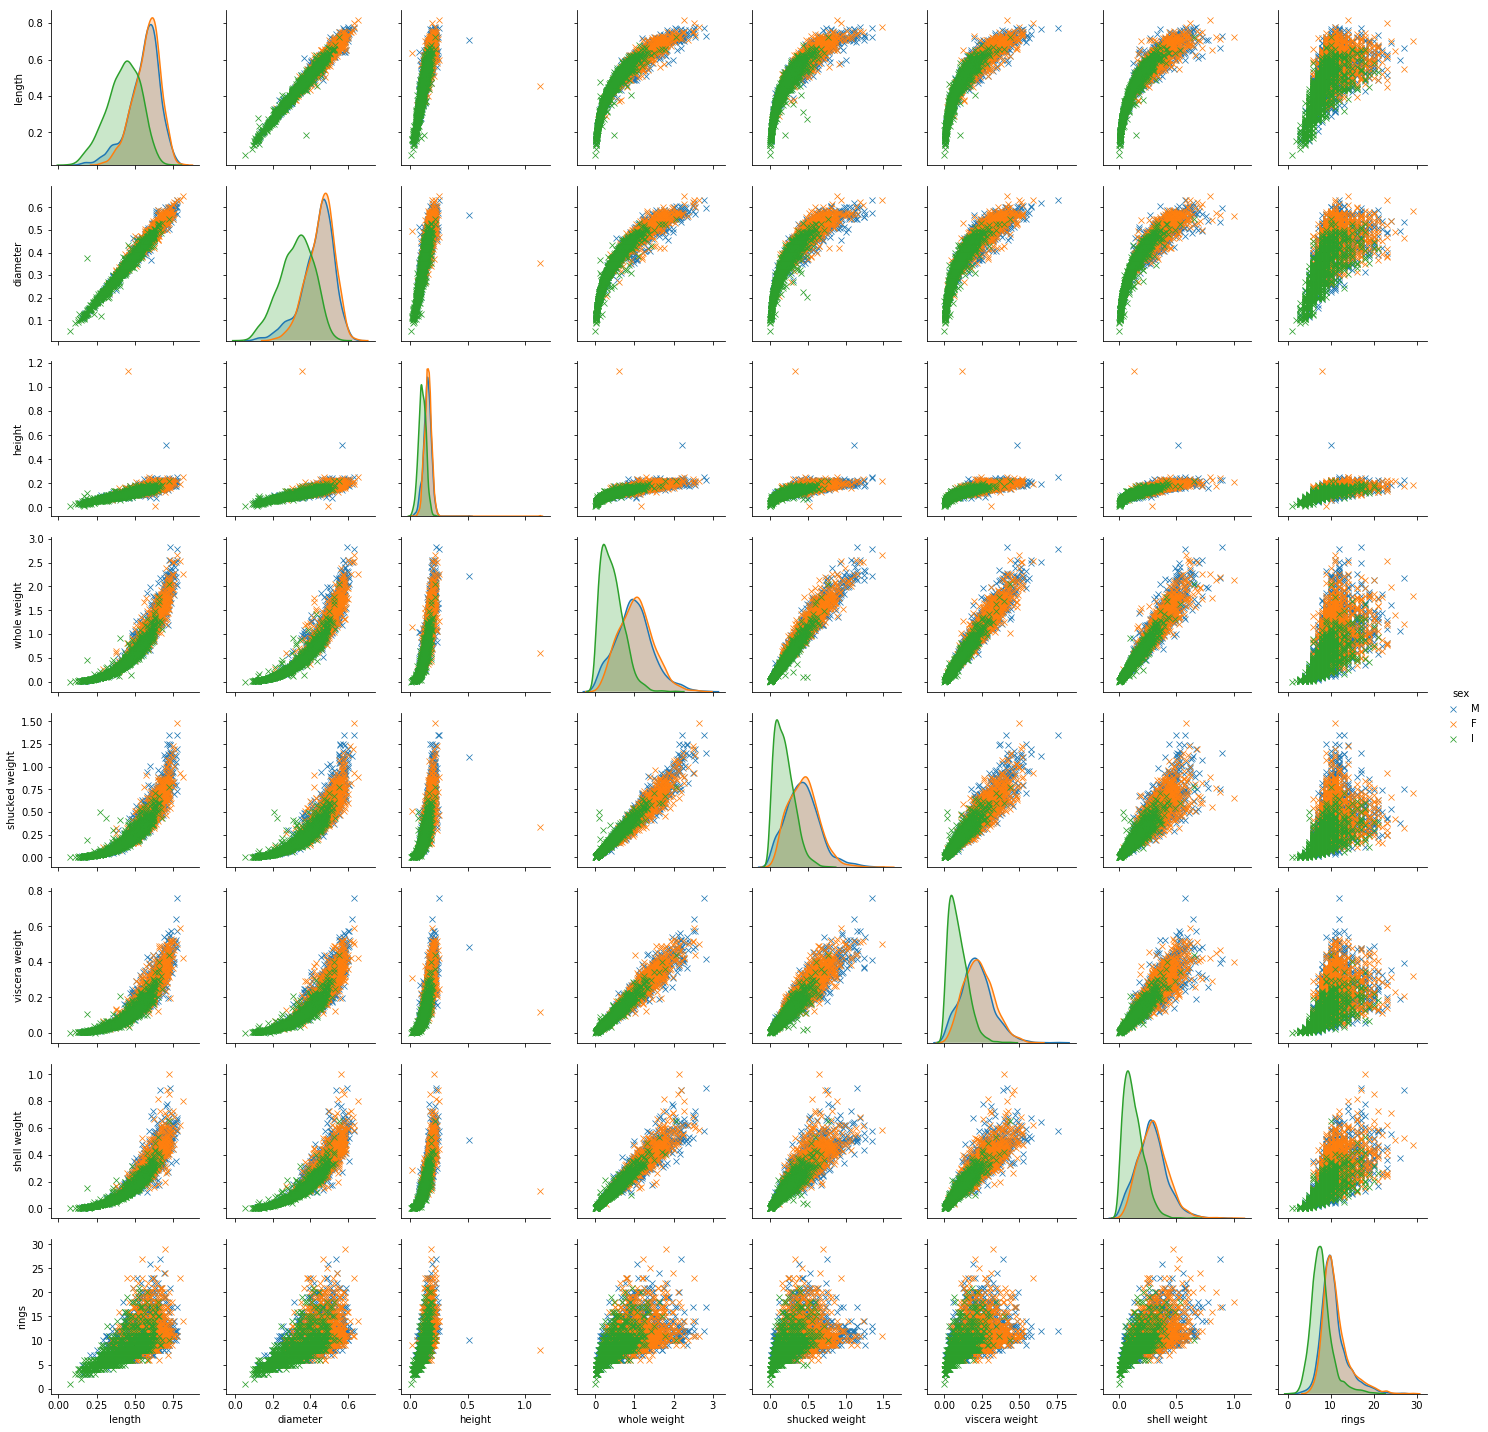

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(abalone, hue='sex', markers='x', diag_kind="kde") # diag_kind = auto, hist, kde
plt.show()

여러 그래프가 있는데, 분포도로 보이는 것들이 선형이면 좋은 그래프(처리하기 좋은)라고 할 수 있지만, 비선형일 경우에는 선형으로 변환할 필요가 있다.

In [54]:
%matplotlib inline
sns.corrplot(abalone) #corrplot 함수가 없다.
plt.show()

AttributeError: 'module' object has no attribute 'corrplot'

In [55]:
#독립변수, 종속변수 준비
abalone['Male'] = (abalone['sex']=='M').astype(int)
abalone['Female'] = (abalone['sex']=='F').astype(int)
abalone['Infant'] = (abalone['sex']=='I').astype(int) #더미변수 생성

In [58]:
#회귀분석
from sklearn.model_selection import train_test_split #최신버전의 sklearn package 사용

train, test = train_test_split(abalone,train_size=0.5) #train, test(split)을 진행

In [59]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_absolute_error

xtrain = train.drop(['rings','sex'],axis=1)
ytrain = train['rings']
xtest = test.drop(['rings','sex'],axis=1)
ytest = test['rings']

In [60]:
print xtrain.head()

      length  diameter  height  whole weight  shucked weight  viscera weight  \
1049   0.715     0.565   0.175        1.9525          0.7645          0.4185   
2860   0.720     0.550   0.180        1.5200          0.6370          0.3250   
2903   0.575     0.425   0.150        0.8765          0.4550          0.1800   
2087   0.720     0.585   0.220        1.9140          0.9155          0.4480   
1459   0.485     0.380   0.120        0.4725          0.2075          0.1075   

      shell weight  Male  Female  Infant  
1049        0.4135     1       0       0  
2860        0.4350     0       1       0  
2903        0.2280     0       1       0  
2087        0.4790     1       0       0  
1459        0.1470     0       0       1  


In [61]:
regression = linear_model.LinearRegression()
regression.fit(xtrain, ytrain) #fit시키면 regression된다

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [62]:
print regression.intercept_ #절편값

3.954577194548458


In [64]:
print train.columns,regression.coef_

zip(train.columns,regression.coef_) #위를 계수명과 붙여서 볼 수 있다.

Index([u'sex', u'length', u'diameter', u'height', u'whole weight',
       u'shucked weight', u'viscera weight', u'shell weight', u'rings',
       u'Male', u'Female', u'Infant'],
      dtype='object') [-0.62  11.05  7.39  8.82 -19.18 -11.51  10.12  0.30  0.32 -0.61]


[('sex', -0.6208280006623079),
 ('length', 11.049021613116436),
 ('diameter', 7.386820189184647),
 ('height', 8.820109481535022),
 ('whole weight', -19.18215985036416),
 ('shucked weight', -11.512152231335003),
 ('viscera weight', 10.119596750531612),
 ('shell weight', 0.29705308697734956),
 ('rings', 0.3178410355541492),
 ('Male', -0.6148941225315211)]

In [65]:
#정확성 계산(선형회귀식)
accuracy = regression.score(xtest,ytest)
print(accuracy*100,'%')

(53.5332703470105, '%')


In [66]:
import numpy as np
print("Mean squared error: %.2f" % np.mean((regression.predict(xtest) - ytest) ** 2))

Mean squared error: 4.95


In [67]:
#예측값과 실제값의 비교
ypred = regression.predict(xtest)

r2 = r2_score(ytest, ypred )
mae = mean_absolute_error(ytest, ypred)

print r2,mae

0.535332703470105 1.6031731466639851


In [68]:
#_df = pd.DataFrame({'Actual': ytest, 'Predicted': ypred.flatten()})
y_actual_pred = pd.DataFrame({'Actual': ytest, 'Predicted': ypred.flatten()})
y_actual_pred.head()

,Actual,Predicted
727,12,9.525511
3937,13,12.534689
1290,7,7.482908
3598,12,11.859250
2094,7,7.727341


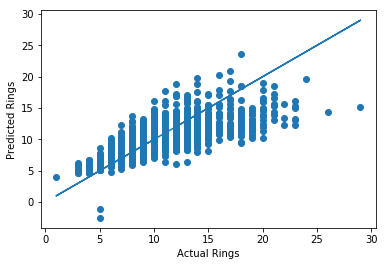

In [69]:
#그래프로 표현

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(ytest,ypred)
ax.set_ylabel('Predicted Rings') 
ax.set_xlabel('Actual Rings')
ax.plot(ytest,ytest) 
#아래 결과의 점이 너무 고루 분포되어 선형의 의미가 없다.
#선형 데이터가 의미를 갖추려면 데이터값에 로그를 씌워준다.